In [1]:
# confusion matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure()
    cm = confusion_matrix(y_test, y_pred)
    # np.set_printoptions(precision=2)


    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{0:.4f}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    
    
    #Roc


def plot_roc_curve(Y_test, Y_pred, nb_classes, class_index, title='Receiver operating characteristic'):
    from sklearn import metrics
    import matplotlib.pyplot as plt
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(nb_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(Y_test[:, i], Y_pred[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(Y_test.ravel(), Y_pred.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])
    
    #plt.figure()
    lw = 2
    plt.plot(fpr[class_index], tpr[class_index], color='darkorange',
             lw=lw, label='ROC curve (area = %0.4f)' % roc_auc[class_index])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()
    
    #epoch history
    

def plot_hist(hist, metrics, num=None):
    import matplotlib.pyplot as plt
    if num is not None:
        fig = plt.figure(num)
    else:
        fig = plt.figure()
    ax1 = fig.add_subplot(111)
    for metric in metrics:
        ax1.plot(hist.history[metric], label=metric)
    # plt.plot(history.history['val_acc'])
    # ax.ylabel(metric)
    plt.title('model history')
    plt.xlabel('epoch')
    #plt.legend(['train', 'test'], loc='upper left')
    plt.legend(loc='upper right');
    plt.show()

Using TensorFlow backend.


Loading normalized data from HDF5...


/usr/local/lib/python3.5/dist-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


Training ExtraTreesClassifier for "attack or not" labels...
Testing accuracy...
0.9837834718141969
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99   2187456
         1.0       0.88      1.00      0.94    290263

    accuracy                           0.98   2477719
   macro avg       0.94      0.99      0.96   2477719
weighted avg       0.99      0.98      0.98   2477719

TP: 289809 FP: 454 TN: 2147730 FN: 39726
Accuracy: 0.5315495506379255
False Positive rate: 0.00021134130037278 True Negative Rate 0.9997886586996272
Normalized confusion matrix
[[0.98183918 0.01816082]
 [0.0015641  0.9984359 ]]


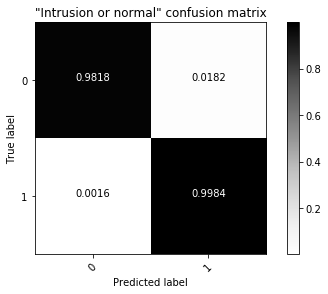

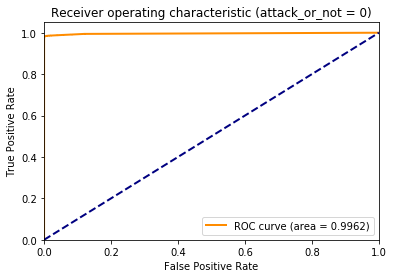

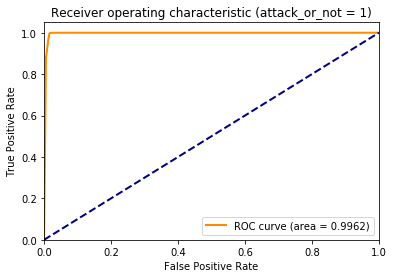

Combining predicted "attack or not" labels to neural network testing data...
Creating neural network...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1250)              32500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1250)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               625500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)         

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:150: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("ma..., outputs=Tensor("de...)`


Epoch 1/100
36020/36020 [==============================] - 2s 68us/step - loss: 1.6956 - acc: 0.3496 - categorical_crossentropy: 1.6956
Epoch 2/100
36020/36020 [==============================] - 1s 17us/step - loss: 1.6312 - acc: 0.3674 - categorical_crossentropy: 1.6312
Epoch 3/100
36020/36020 [==============================] - 1s 18us/step - loss: 1.6233 - acc: 0.3721 - categorical_crossentropy: 1.6233
Epoch 4/100
36020/36020 [==============================] - 1s 18us/step - loss: 1.6185 - acc: 0.3732 - categorical_crossentropy: 1.6185
Epoch 5/100
36020/36020 [==============================] - 1s 17us/step - loss: 1.6144 - acc: 0.3750 - categorical_crossentropy: 1.6144
Epoch 6/100
36020/36020 [==============================] - 1s 18us/step - loss: 1.6123 - acc: 0.3738 - categorical_crossentropy: 1.6123
Epoch 7/100
36020/36020 [==============================] - 1s 18us/step - loss: 1.6130 - acc: 0.3744 - categorical_crossentropy: 1.6130
Epoch 8/100
36020/36020 [=======================

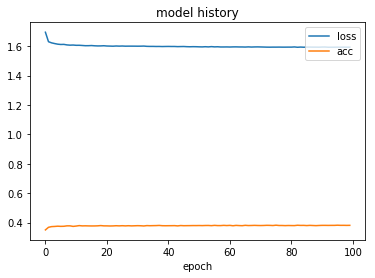

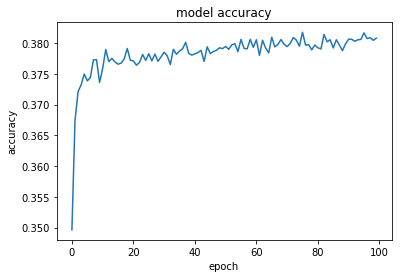

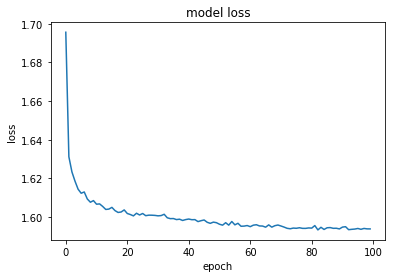

Testing neural network...
0.9512632384866888


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       268
           1       0.00      0.04      0.01       233
           2       0.05      0.03      0.04     11353
           3       0.09      0.00      0.01     39525
           4       0.15      0.53      0.23     19246
           5       0.81      0.99      0.89    210481
           6       1.00      0.98      0.99   2187456
           7       0.06      0.03      0.04      8987
           8       0.00      0.00      0.00       152
           9       0.00      0.00      0.00        18

    accuracy                           0.95   2477719
   macro avg       0.22      0.26      0.22   2477719
weighted avg       0.95      0.95      0.95   2477719

Normalized confusion matrix
[[0.00000000e+00 3.73134328e-03 2.23880597e-02 3.73134328e-03
  1.82835821e-01 7.79850746e-01 0.00000000e+00 7.46268657e-03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.86266094e-02 3.43347639e-02 4.2918454

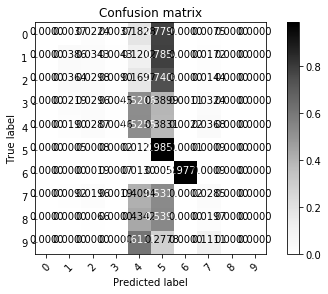

Saving neural network model...


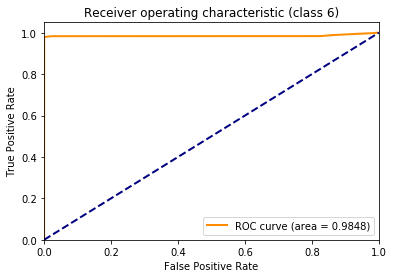

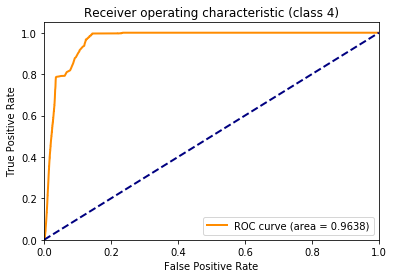

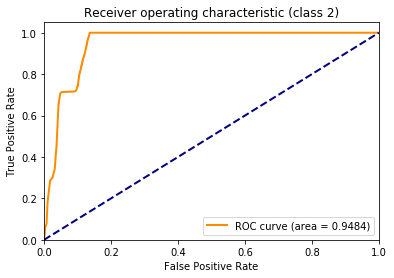

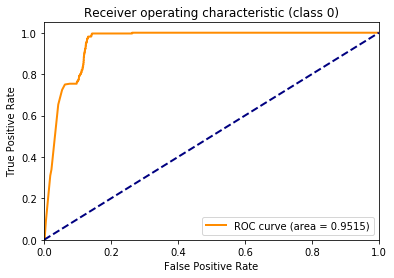

Fitting...
Predicting...
Testing accuracy...
0.8797829778114468


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       268
           1       0.01      0.06      0.01       233
           2       0.13      0.28      0.17     11353
           3       0.05      0.29      0.09     39525
           4       0.18      0.49      0.26     19246
           5       0.00      0.00      0.00    210481
           6       1.00      0.99      0.99   2187456
           7       0.22      0.03      0.05      8987
           8       0.00      0.00      0.00       152
           9       0.00      0.00      0.00        18

    accuracy                           0.88   2477719
   macro avg       0.16      0.21      0.16   2477719
weighted avg       0.89      0.88      0.88   2477719

Normalized confusion matrix
[[0.00000000e+00 1.86567164e-02 2.20149254e-01 5.59701493e-01
  2.01492537e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.43776824e-02 2.53218884e-01 5.2360515

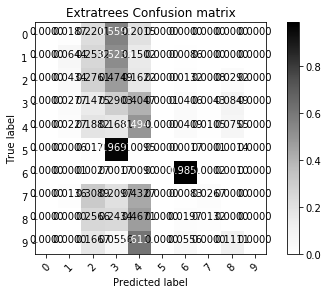

Saving X and Y to HDF5


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input, merge, Lambda
from keras.models import Model
from keras.optimizers import SGD
import numpy as np

from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.regularizers import l2 as activity_l2

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#from sklearn.metrics import confusion_matrix as cm
#from sklearn.metrics import roc_curve as roc
#from mlxtend.plotting import plot_confusion_matrix

#tagy
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
tf.Session(config=config)

print('Loading normalized data from HDF5...')
import h5py
h5f = h5py.File('datasets.h5', 'r')
X_train = h5f['X_nn_train'].value
Y_train = h5f['Y_nn_train'].value.astype(np.float32)
X_test = h5f['X_nn_test'].value
Y_test = h5f['Y_nn_test'].value.astype(np.float32)

X_train2 = h5f['X_rf_train'].value
Y_train2 = h5f['Y_rf_train'].value.astype(np.float32)
X_test2 = h5f['X_rf_test'].value
Y_test2 = h5f['Y_rf_test'].value.astype(np.float32)
h5f.close()


from sklearn.ensemble import ExtraTreesClassifier

print('Training ExtraTreesClassifier for "attack or not" labels...')
model2 = ExtraTreesClassifier(n_estimators=31, criterion='entropy')
model2 = model2.fit(X_train2, Y_train2)

Y_pred2 = model2.predict_proba(X_test2)[:,1]

print('Testing accuracy...')
score2 = accuracy_score(Y_test2, np.around(Y_pred2))
print(score2)
print(classification_report(Y_test2, np.around(Y_pred2)))

def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
    for i in range(len(y_hat)): 
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==0:
           TN += 1
    for i in range(len(y_hat)): 
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

TP, FP, TN, FN = perf_measure(np.around(Y_pred2), Y_test2)

fp_rate = FP/(TN+FP)
tn_rate = TN/(TN+FP)

accuracy = (TN+TP)/(TN+FP+TP+TN)
precision = TP/(TN+FP)
hitrate = TP/(TN+FN)

print('TP:', TP, 'FP:', FP, 'TN:', TN, 'FN:', FN)
print('Accuracy:', accuracy)
print('False Positive rate:', fp_rate, 'True Negative Rate', tn_rate)

def to_cat(y):
    y_tmp = np.ndarray(shape=(y.shape[0], 2), dtype=np.float32)
    for i in range(y.shape[0]):
        y_tmp[i, :] = np.array([1-y[i], y[i]])   # np.array([0,1]) if y[i] else np.array([1,0])
    return y_tmp


plot_confusion_matrix(Y_test2, np.round(Y_pred2), classes=list(range(2)),
                           normalize=True,
                         title='"Intrusion or normal" confusion matrix')

plot_roc_curve(to_cat(Y_test2), to_cat(Y_pred2), 2, 0, title='Receiver operating characteristic (attack_or_not = 0)')
plot_roc_curve(to_cat(Y_test2), to_cat(Y_pred2), 2, 1, title='Receiver operating characteristic (attack_or_not = 1)')






if 'session' in locals() and session is not None:
    print('Close interactive session')
    session.close()
    
#  Starting Network shit


print('Combining predicted "attack or not" labels to neural network testing data...')
X_test = np.concatenate((Y_pred2[:,np.newaxis], X_test), axis=1)

print('Creating neural network...')
num_of_features = X_train.shape[1]
nb_classes = Y_train.shape[1]


def residual_layer(size, x):
    
    y = Dense(size, activation='sigmoid', W_regularizer=l2(0.01), activity_regularizer=activity_l2(0.01))(x)
    # x = Dropout(0.5)(x)
    # print(x.get_shape().as_list()[1])
    y = Dense(x.get_shape().as_list()[1], activation='sigmoid',  W_regularizer=l2(0.01), activity_regularizer=activity_l2(0.01))(y)
    res = merge([y, x], mode='sum')
    return res


def baseline_model():
    def branch2(x):
        
        x = Dense(int(np.floor(num_of_features*50)), activation='relu')(x)
        x = Dropout(0.75)(x)
        
        x = Dense(int(np.floor(num_of_features*20)), activation='relu')(x)
        x = Dropout(0.5)(x)
        
        x = Dense(int(np.floor(num_of_features)), activation='relu')(x)
        x = Dropout(0.1)(x)
        return x
    
    main_input = Input(shape=(num_of_features,), name='main_input')

    x = main_input
    x = branch2(x)
    main_output = Dense(nb_classes, activation='softmax')(x)
    model = Model(input=main_input, output=main_output)    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'categorical_crossentropy'])
    model.summary()
    return model

model = baseline_model()

print('Training neural network...')
history = model.fit(X_train, Y_train,
                    epochs=100,
                    batch_size=128
                    )

print('Plotting training history data...')
print(history.history.keys())

#from  epoch_history_plot import  plot_hist

plot_hist(history, ['loss', 'acc'])

# summarize history for accuracy
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.figure()
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('Testing neural network...')
Y_predicted = model.predict(X_test)

max_probs = np.argmax(Y_predicted, axis=1)
Y_pred = np.zeros(Y_predicted.shape)
for row, col in enumerate(max_probs):
    Y_pred[row,col] = 1

score = accuracy_score(Y_test, Y_pred)
print(score)
print(classification_report(Y_test.argmax(axis=-1), Y_pred.argmax(axis=-1)))


plot_confusion_matrix(Y_test.argmax(axis=-1), Y_pred.argmax(axis=-1), classes=list(range(10)),
                          normalize=True,
                          title='Confusion matrix')

print('Saving neural network model...')
json_string = model.to_json()
with open('neural_model1.json', 'w') as f:
    f.write(json_string)
model.save_weights('neural_model_weights1.h5')

model.save('neural_model1.h5')

plot_roc_curve(Y_test, Y_predicted, nb_classes, 6, title='Receiver operating characteristic (class 6)')
plot_roc_curve(Y_test, Y_predicted, nb_classes, 4, title='Receiver operating characteristic (class 4)')
plot_roc_curve(Y_test, Y_predicted, nb_classes, 2, title='Receiver operating characteristic (class 2)')
plot_roc_curve(Y_test, Y_predicted, nb_classes, 0, title='Receiver operating characteristic (class 0)')


model3 = ExtraTreesClassifier(n_estimators=5, criterion='entropy')
print('Fitting...')
model3 = model2.fit(X_train, Y_train.argmax(axis=-1))
print('Predicting...')
Y_predicted3 = model3.predict(X_test)

print('Testing accuracy...')
score3 = accuracy_score(Y_test.argmax(axis=-1), Y_predicted3)
print(score3)
print(classification_report(Y_test.argmax(axis=-1), Y_predicted3))

plot_confusion_matrix(Y_test.argmax(axis=-1), Y_predicted3, classes=list(range(10)),
                          normalize=True,
                          title='Extratrees Confusion matrix')


print('Saving X and Y to HDF5')
h5f = h5py.File('results.h5', 'w')
h5f.create_dataset('Y_predicted', data=Y_pred)
h5f.create_dataset('Y_expected', data=Y_test)
h5f.close()